In [1]:
!pip install aif360
!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import joblib
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, roc_curve

from aif360.sklearn.metrics import specificity_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import *
from sklearn import metrics
import pickle
import shap

     |████████████████████████████████| 175 kB 7.2 MB/s 
     |████████████████████████████████| 564 kB 91.2 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31285 sha256=a35626cd348a393863bcecd73912f231c0fb12d0b24bba62aa0c09fb6e9a6f28
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


# Data load

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# train_2014 = pd.read_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2014_NSOK_train_preprocessed_2.csv')
# train_2014 = train_2014.drop('Unnamed: 0', axis=1)

# test_2014 = pd.read_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2014_NSOK_test_preprocessed_2.csv')
# test_2014 = test_2014.drop('Unnamed: 0', axis=1)

# test_2017 = pd.read_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2017_NSOK_preprocessed_2.csv')
# test_2017 = test_2017.drop('Unnamed: 0', axis=1)

# test_2020 = pd.read_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2020_NSOK_preprocessed_2.csv')
# test_2020 = test_2020.drop('Unnamed: 0', axis=1)

In [4]:
# print(train_2014.shape)
# print(test_2014.shape)
# print(test_2017.shape)
# print(test_2020.shape)

(7196, 270)
(3085, 270)
(10083, 270)
(9920, 270)


In [5]:
# len(train_2014[train_2014['suicide']==1])

701

In [6]:
# ## 4. over sampling for balanced data

# smote = ADASYN()

# X_train_df = train_2014.drop('suicide', axis=1)
# y_train_df = train_2014['suicide']

# X_train, y_train = smote.fit_resample(X_train_df, y_train_df)

# X_train = pd.DataFrame(X_train, columns=X_train_df.columns)
# y_train = pd.DataFrame(y_train)

In [7]:
# sample_over = pd.concat([X_train, y_train], axis=1)
# sample_over.shape

(12764, 270)

In [8]:
# sample_over.to_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/train_over.csv')

## 여기부터

In [9]:
sample_over = pd.read_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/train_over.csv')
sample_over = sample_over.drop('Unnamed: 0', axis=1)

test_2014 = pd.read_csv('/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2014_NSOK_test_preprocessed_2.csv')
test_2014 = test_2014.drop('Unnamed: 0', axis=1)

In [10]:
print(sample_over.shape)
print(test_2014.shape)

(12764, 270)
(3085, 270)


In [11]:
X_train = sample_over.drop('suicide', axis=1)
y_train = sample_over['suicide']

X_test = test_2014.drop('suicide', axis=1)
y_test = test_2014['suicide']

In [12]:
y_train.isnull().sum()[y_train.isnull().sum()!=0]

array([], dtype=int64)

In [13]:
X_train.shape

(12764, 269)

# Make 5 ML models

In [14]:
models = []
params = []

## 1. Logistic model

In [15]:
model = ('LR', LogisticRegression(solver='liblinear', multi_class='auto', random_state=1120))
param = {
    'C': [i/100.0 for i in range(1, 100)],
    'class_weight': [None],
    'penalty': ['l2']
}

models.append(model)
params.append(param)

## l2 적용 가능
# {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

## 2. Random Forest model
https://injo.tistory.com/30



In [83]:

model = ('RF', RandomForestClassifier(random_state=1120))
param = {
    'n_estimators': [500],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [2,3,5],
    'max_features': [90],
    'max_depth': [13],
    'class_weight': [None]
}

models.append(model)
params.append(param)

# {'class_weight': None, 'max_depth': 10, 'max_features': 72, 'min_samples_leaf': 150, 'min_samples_split': 150, 'n_estimators': 500}
# {'class_weight': None, 'max_depth': 13, 'max_features': 90, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 500}
# {'class_weight': None, 'max_depth': 13, 'max_features': 90, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}
# {'class_weight': None, 'max_depth': 13, 'max_features': 90, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}

    # 'n_estimators': [500],
    # 'min_samples_split': [300, 500, 700, 900],
    # 'min_samples_leaf': [300, 500, 700, 900],
    # 'max_features': [50, 60, 70, 80],
    # 'max_depth': [10, 13, 16],
    # 'class_weight': [None]

## L2???
# To use L2 regularization, you need a vector to take the norm of. For example, in linear regression or linear classification, we use the norm of the weight vector to make sure none of the weights gets too large, and a lot of weights will be set to 0 (due to the nature of the  1 -norm).
# What vector would you use for random forests? In the standard random forest classifier there is no suitable weight vector.
# The only thing I can think of is to give each tree a weight (the default is that each tree gets an equal weight) but using an L1 norm would make it so that a lot of the trees in the forest get no vote — this goes counter to the entire philosophy behind the method

## 3. Feed-forward Network (MLP)

In [ ]:
model = ('MLP', MLPClassifier(random_state=1120, max_iter=2000, batch_size=128))
param = {
    'hidden_layer_sizes': [(25), (30), (35)],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'activation': ['tahn','relu'],
    'solver': ['sgd', 'adam']
}

models.append(model)
params.append(param)

# {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'solver': 'sgd'}

## l2 reg -> alpha 값으로 조절

## 4. Make SVM model

In [ ]:
model = ('SVC', SVC(random_state=1120, probability=True))
param = [
    {'kernel': ['linear'], 'C': [1, 10, 50, 100]},
    # {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [0.5, 1]}
]

models.append(model)
params.append(param)

#{'C': 1, 'degree': 1, 'kernel': 'poly'}

## l2 는 linear에만 적용가능
# from sklearn import svm
# svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
# svc

## 5. Make XGBoost model

https://injo.tistory.com/44

In [ ]:
# model = ('XGB', XGBClassifier(random_state=1120, tree_method='gpu_hist')) ## gpu_hist 옵션주면 shap 돌릴 때 런타임 사망..
model = ('XGB', XGBClassifier(random_state=1120))
param = {
    'learning_rate': [0.01], ## 오버피팅 막기위해 learning_rate을 낮추면 n_estimators는 높여주어야 함
    'n_estimators': [1000],
    'min_child_weight': [8], ## 클수록 오버피팅 방지
    'max_depth': [2], ## 작을수록
    'subsample':[0.7],
    'colsample_bytree':[0.7],
    'scale_pos_weight' : [1],
    'gamma':[0.2],
    'reg_alpha':[1e-5]
}

models.append(model)
params.append(param)

## 이것도 tree기반이니까 안될듯. 

#{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 8, 'n_estimators': 1000, 'scale_pos_weight': 1, 'subsample': 0.7}
# https://www.kaggle.com/lifesailor/xgboost

In [ ]:
model[1]

RandomForestClassifier(random_state=1120)

# Grid search & Fitting the model

In [16]:
## scoring = roc_auc, f1, recall ... 
def fitting_cv(model, param, kfold, train_input, train_target, scoring='roc_auc', n_jobs=1, tracking=True):
    name = model[0]
    estimator = model[1]
    if tracking:
        start_time = datetime.now()
        print("[%s] Start parameter search for model '%s'" % (start_time, name))
        gridsearch = GridSearchCV(estimator=estimator, param_grid=param, cv=cv_idx, scoring=scoring, n_jobs=n_jobs)
        gridsearch.fit(train_input, train_target)
        end_time = datetime.now()
        duration_time = (end_time - start_time).seconds
        print("[%s] Finish parameter search for model '%s' (time: %d seconds)" % (end_time, name, duration_time))
        print()
    else:
        gridsearch = GridSearchCV(estimator=estimator, param_grid=param, cv=kfold, scoring=scoring, n_jobs=n_jobs)
        gridsearch.fit(train_input, train_target)
    
    return gridsearch   

In [17]:
# Generating cross-validation index
cv_idx = StratifiedKFold(n_splits=10, shuffle=True, random_state=1120)

In [ ]:
result = fitting_cv(model=model, param=param, kfold=cv_idx, train_input=X_train.values, train_target=y_train.values, n_jobs=-1)

[2022-01-09 10:59:13.541986] Start parameter search for model 'RF'


In [ ]:
print(result.best_score_)

In [ ]:
# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_LR.model"  
# result = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_RF.model"  
# result = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_MLP.model"  
# result = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_SVC.model"  
# result = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_XGB.model"  
# result = joblib.load(model_file_path)

In [ ]:
print(result.best_params_)

In [72]:
y_train_prob = result.predict_proba(X_train.values)
y_train_pred = result.predict(X_train.values)

print('Accuracy: %.4f' % metrics.accuracy_score(y_train, y_train_pred))
print('AUC: %.4f' % metrics.roc_auc_score(y_train, y_train_prob[:, 1]))
print(metrics.classification_report(y_train, y_train_pred))

Accuracy: 0.9748
AUC: 0.9977
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      6495
         1.0       0.98      0.96      0.97      6269

    accuracy                           0.97     12764
   macro avg       0.98      0.97      0.97     12764
weighted avg       0.97      0.97      0.97     12764



In [73]:
# Optimal Threshold for ROC Curve (maximizing f1)
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
# https://stackoverflow.com/questions/19984957/scikit-learn-predict-default-threshold

y_test_prob = result.predict_proba(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.333765, G-Mean=0.714


In [74]:
y_test_prob = result.predict_proba(X_test.values)
y_test_pred  = (y_test_prob[:,1] >= thresholds[ix]).astype(bool)
# y_test_pred  = result.predict(X_test.values)

In [75]:
print('Accuracy: %.4f' % metrics.accuracy_score(y_test, y_test_pred))
print('AUC: %.4f' % metrics.roc_auc_score(y_test, y_test_prob[:, 1]))
print(metrics.classification_report(y_test, y_test_pred))

Accuracy: 0.7041
AUC: 0.7659
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81      2785
         1.0       0.21      0.73      0.32       300

    accuracy                           0.70      3085
   macro avg       0.58      0.71      0.57      3085
weighted avg       0.89      0.70      0.76      3085



In [76]:
## AUROC
print('%.4f' % metrics.roc_auc_score(y_test, y_test_prob[:, 1]))

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_test_pred)
print('%.4f' % f1)

# cohen's kappa score
kappa = cohen_kappa_score(y_test, y_test_pred)
print('%.4f' % kappa)

# Sensitivity: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred)
print('%.4f' % recall)

## acc
print('%.4f' % metrics.accuracy_score(y_test, y_test_pred))

# Specificity 
specificity = specificity_score(y_test, y_test_pred)
print('%.4f' % specificity)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred)
print('%.4f' % precision)

# Threshold
print('%.4f' % thresholds[ix])

0.7659
0.3232
0.2026
0.7267
0.7041
0.7016
0.2078
0.3338


In [36]:
metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[1850,  935],
       [  75,  225]])

In [37]:
# # fn for optimal threshold search
# def expect_f1(proba, thres, y):
#     lr_pred_new = [1 if proba[i]> thres else 0 for i in range(len(proba))]
#     return metrics.f1_score(y, lr_pred_new)

## External validation 2017

In [38]:
data_path = '/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2017_NSOK_preprocessed_2.csv'

ex_val_data = pd.read_csv(data_path) ## sperater, delimiter 확인
ex_val_data = ex_val_data.drop('Unnamed: 0', axis=1)

X_ex_val = ex_val_data.drop('suicide', axis=1)
y_ex_val = ex_val_data['suicide']

In [39]:
# Optimal Threshold for ROC Curve (maximizing f1)

y_ex_val_prob = result.predict_proba(X_ex_val.values)
fpr, tpr, thresholds = roc_curve(y_ex_val, y_ex_val_prob[:,1])
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.649


In [40]:
y_train_prob = result.predict_proba(X_train.values)
y_train_pred = result.predict(X_train.values)

y_ex_val_prob = result.predict_proba(X_ex_val.values)
y_ex_val_pred  = (y_ex_val_prob[:,1] >= thresholds[ix]).astype(bool)
# y_ex_val_pred  = result.predict(X_ex_val.values)

In [41]:
print('Accuracy: %.4f' % metrics.accuracy_score(y_ex_val, y_ex_val_pred))
print('AUC: %.4f' % metrics.roc_auc_score(y_ex_val, y_ex_val_prob[:, 1]))
print(metrics.classification_report(y_ex_val, y_ex_val_pred))

Accuracy: 0.8024
AUC: 0.6497
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      9453
         1.0       0.16      0.51      0.24       630

    accuracy                           0.80     10083
   macro avg       0.56      0.67      0.57     10083
weighted avg       0.91      0.80      0.85     10083



In [42]:
## AUROC
print('%.4f' % metrics.roc_auc_score(y_ex_val, y_ex_val_prob[:, 1]))

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_ex_val, y_ex_val_pred)
print('%.4f' % f1)

# cohen's kappa score
kappa = cohen_kappa_score(y_ex_val, y_ex_val_pred)
print('%.4f' % kappa)

# Sensitivity: tp / (tp + fn)
recall = recall_score(y_ex_val, y_ex_val_pred)
print('%.4f' % recall)

## acc
print('%.4f' % metrics.accuracy_score(y_ex_val, y_ex_val_pred))

# Specificity 
specificity = specificity_score(y_ex_val, y_ex_val_pred)
print('%.4f' % specificity)

# precision tp / (tp + fp)
precision = precision_score(y_ex_val, y_ex_val_pred)
print('%.4f' % precision)

# Threshold
print('%.4f' % thresholds[ix])

0.6497
0.2449
0.1655
0.5127
0.8024
0.8217
0.1609
1.0000


In [43]:
metrics.confusion_matrix(y_ex_val, y_ex_val_pred, labels=None, sample_weight=None, normalize=None)

array([[7768, 1685],
       [ 307,  323]])

## External validation 2020

In [44]:
data_path = '/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2020_NSOK_preprocessed_2.csv'

ex_val_data = pd.read_csv(data_path) ## sperater, delimiter 확인
ex_val_data = ex_val_data.drop('Unnamed: 0', axis=1)

X_ex_val = ex_val_data.drop('suicide', axis=1)
y_ex_val = ex_val_data['suicide']

In [45]:
# Optimal Threshold for ROC Curve (maximizing f1)

y_ex_val_prob = result.predict_proba(X_ex_val.values)
fpr, tpr, thresholds = roc_curve(y_ex_val, y_ex_val_prob[:,1])
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.098880, G-Mean=0.702


In [46]:
y_train_prob = result.predict_proba(X_train.values)
y_train_pred = result.predict(X_train.values)

y_ex_val_prob = result.predict_proba(X_ex_val.values)
y_ex_val_pred  = (y_ex_val_prob[:,1] >= thresholds[ix]).astype(bool)
# y_ex_val_pred  = result.predict(X_ex_val.values)

In [47]:
print('Accuracy: %.4f' % metrics.accuracy_score(y_ex_val, y_ex_val_pred))
print('AUC: %.4f' % metrics.roc_auc_score(y_ex_val, y_ex_val_prob[:, 1]))
print(metrics.classification_report(y_ex_val, y_ex_val_pred))

Accuracy: 0.6517
AUC: 0.7579
              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79      9733
         1.0       0.04      0.76      0.08       187

    accuracy                           0.65      9920
   macro avg       0.52      0.70      0.43      9920
weighted avg       0.97      0.65      0.77      9920



In [48]:
## AUROC
print('%.4f' % metrics.roc_auc_score(y_ex_val, y_ex_val_prob[:, 1]))

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_ex_val, y_ex_val_pred)
print('%.4f' % f1)

# cohen's kappa score
kappa = cohen_kappa_score(y_ex_val, y_ex_val_pred)
print('%.4f' % kappa)

# Sensitivity: tp / (tp + fn)
recall = recall_score(y_ex_val, y_ex_val_pred)
print('%.4f' % recall)

## acc
print('%.4f' % metrics.accuracy_score(y_ex_val, y_ex_val_pred))

# Specificity 
specificity = specificity_score(y_ex_val, y_ex_val_pred)
print('%.4f' % specificity)

# precision tp / (tp + fp)
precision = precision_score(y_ex_val, y_ex_val_pred)
print('%.4f' % precision)

# Threshold
print('%.4f' % thresholds[ix])

0.7579
0.0760
0.0416
0.7594
0.6517
0.6496
0.0400
0.0989


In [49]:
metrics.confusion_matrix(y_ex_val, y_ex_val_pred, labels=None, sample_weight=None, normalize=None)

array([[6323, 3410],
       [  45,  142]])

In [50]:
# save model
model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_%s.model" % model[0] 
joblib.dump(result, model_file_path)

['/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_LR.model']

# Visualize model's results

In [ ]:
model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/2014_over_model_XGB.model"  
result = joblib.load(model_file_path)

In [ ]:
# model = pickle.load(open("saved_model_file", "rb"))
# cols_when_model_builds = model.get_booster().feature_names
# pd_dataframe = pd_dataframe[cols_when_model_builds]

## 2. SHAP
- https://github.com/slundberg/shap

In [ ]:
best_model = result.best_estimator_
explainer = shap.TreeExplainer(best_model)

In [ ]:
col_dict = {'performance' : 'Physical malperform',
'RES_AGE_y' : 'Age',
'living_sudo' : 'Living in metropolitan area',
'J1b_1_y' : 'Expense for medical treatment',
'gds15_i' : 'Depression (gds15)',
'H16_7_y' : 'Life satisfaction',
'bmi' : 'BMI',
'cohab_mean_age' : 'Mean age of cohabitants',
'friends_contact' : 'Frequency of contacting with friends',
'B2_3_y' : 'Number of chronic diseases',
'J6b_1_y' : 'Real estate property',
'J1b_4_y' : 'Expense for events (e.g., funeral)',
'H16_4_y' : 'Relation satisfaction with children',
'call_child_out' : 'Frequency of phone call with seperated children',
'cohab_mean_edu_y' : 'Mean educational year of cohabitants',
'H14_1_3_y' : 'Experience of feeling offended by someone',
'J6b_2_y' : 'Financial property',
'J3b_3_3_y' : 'Family income',
'E2_2_1_y' : 'Length of prior work experience',
'B4_1_etc_y' : 'Number of hospital visits',
}


X_test_r = X_test.rename(columns=col_dict)
shap_values = explainer.shap_values(X_test_r)

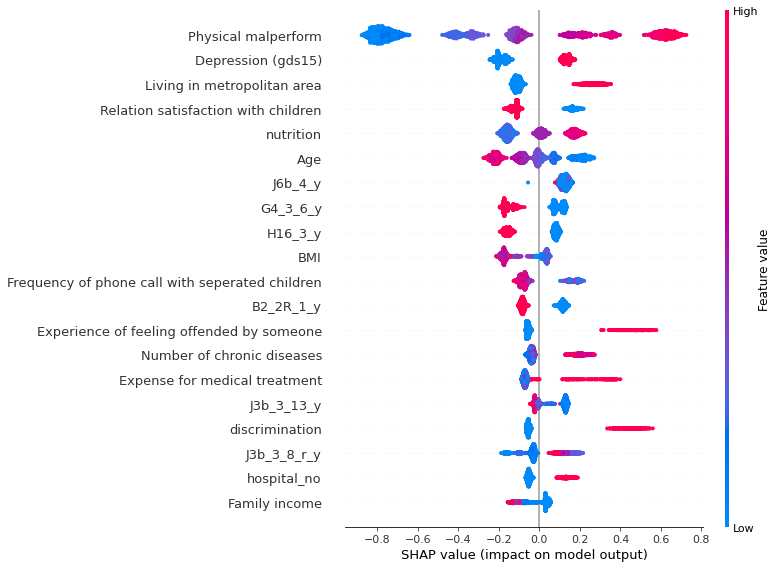

In [ ]:
shap.summary_plot(shap_values, X_test_r, layered_violin_max_num_bins=20)

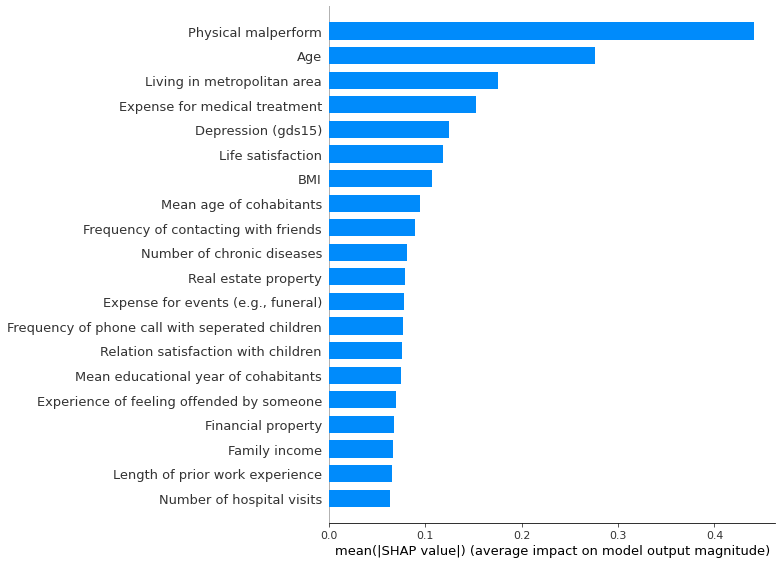

In [ ]:
shap.summary_plot(shap_values, X_test_r, plot_type="bar")

In [ ]:
data_path = '/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2017_NSOK_preprocessed_2.csv'

ex_val_data = pd.read_csv(data_path) ## sperater, delimiter 확인
ex_val_data = ex_val_data.drop('Unnamed: 0', axis=1)

X_ex_val = ex_val_data.drop('suicide', axis=1)
y_ex_val = ex_val_data['suicide']

In [ ]:
col_dict = {'performance' : 'Physical malperform',
'gds15_i' : 'Depression (gds15)',
'living_sudo' : 'Living in metropolitan area',
'RES_AGE_y' : 'Age',
'H16_7_y' : 'Life satisfaction',
'H14_1_3_y' : 'Experience of feeling offended by someone',
'nutrition' : 'Malnutrition',
'H16_4_y' : 'Relation satisfaction with children',
'J1b_1_y' : 'Expense for medical treatment',
'H16_2_y' : 'Subjective economic satisfaction',
'hospital_no' : 'Unable to receive medical treatment ',
'cohab_mean_edu_y' : 'Mean educational year of cohabitants',
'G4_3_6_y' : 'Helping spouse for medical purpose', ## 도움 줌
'H16_3_y' : 'Relation satisfaction with spouse',
'call_child_out' : 'Frequency of phone call with seperated children',
'J6b_4_y' : 'Financial debt',
'friends_contact' : 'Frequency of contacting with friends',
'fac_dist' : 'Distance to community facilities ',
'meet_child_out' : 'Frequency of meeting seperated children',
'RES_EDU2_y' : 'Educational year',
}


X_ex_val_r = X_ex_val.rename(columns=col_dict)
shap_values = explainer.shap_values(X_ex_val_r)

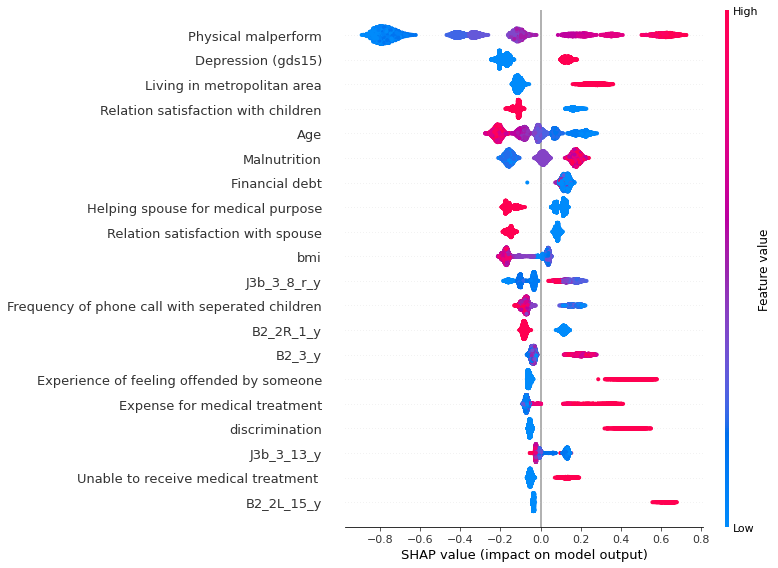

In [ ]:
shap.summary_plot(shap_values, X_ex_val_r)

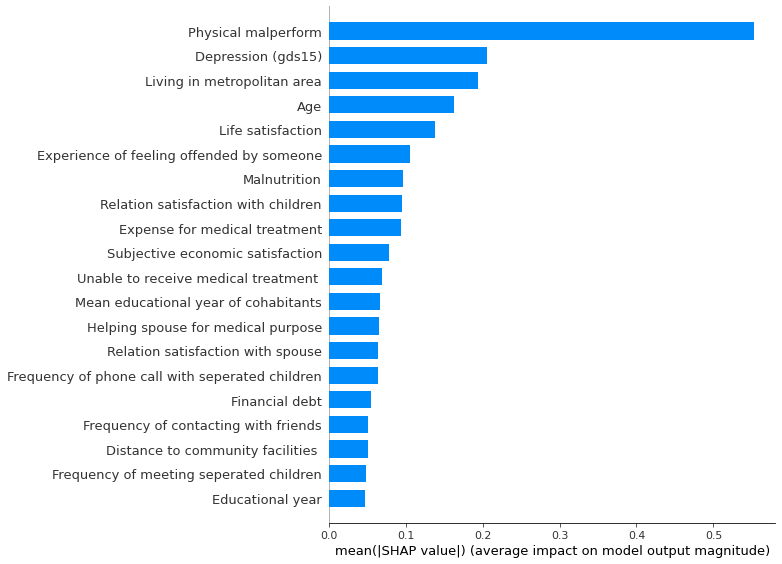

In [ ]:
shap.summary_plot(shap_values, X_ex_val_r, plot_type="bar")

In [ ]:
data_path = '/content/gdrive/My Drive/성은이파이썬/ICT_ML/data/2020_NSOK_preprocessed_2.csv'

ex_val_data = pd.read_csv(data_path) ## sperater, delimiter 확인
ex_val_data = ex_val_data.drop('Unnamed: 0', axis=1)

X_ex_val = ex_val_data.drop('suicide', axis=1)
y_ex_val = ex_val_data['suicide']

In [ ]:
col_dict = {'performance' : 'Physical malperform',
'gds15_i' : 'Depression (gds15)',
'living_sudo' : 'Living in metropolitan area',
'RES_AGE_y' : 'Age',
'H16_7_y' : 'Life satisfaction',
'H16_4_y' : 'Relation satisfaction with children',
'H16_2_y' : 'Subjective economic satisfaction',
'nutrition' : 'Malnutrition',
'H14_1_3_y' : 'Experience of feeling offended by someone',
'J1b_1_y' : 'Expense for medical treatment',
'G4_3_6_y' : 'Helping spouse for medical purpose', ## 도움 줌
'H16_3_y' : 'Relation satisfaction with spouse',
'cohab_mean_edu_y' : 'Mean educational year of cohabitants',
'discrimination' : 'Experience of discrimination',
'call_child_out' : 'Frequency of phone call with seperated children',
'J6b_4_y' : 'Financial debt',
'meet_child_out' : 'Frequency of meeting seperated children',
'fac_dist' : 'Distance to community facilities ',
'hospital_no' : 'Unable to receive medical treatment ',
'friends_contact' : 'Frequency of contacting with friends',
}


X_ex_val_r2 = X_ex_val.rename(columns=col_dict)
shap_values = explainer.shap_values(X_ex_val_r2)

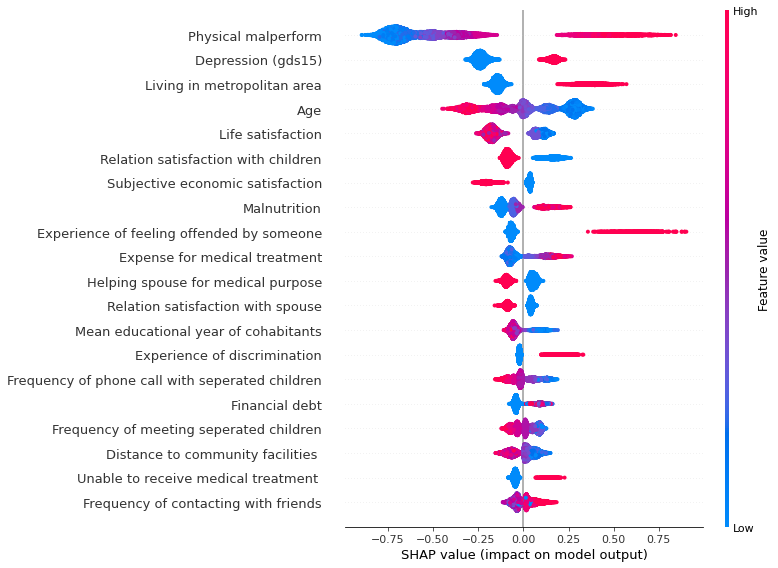

In [ ]:
shap.summary_plot(shap_values, X_ex_val_r2)

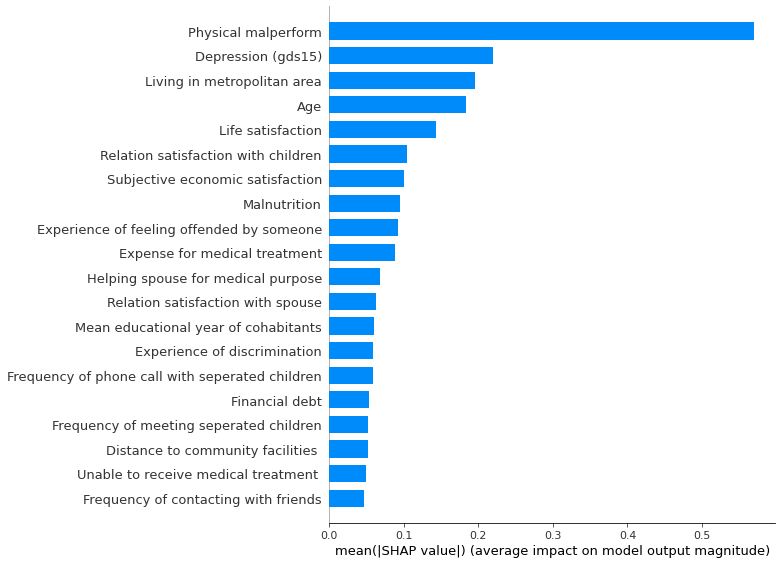

In [ ]:
shap.summary_plot(shap_values, X_ex_val_r2, plot_type="bar")

## ROC curve

In [ ]:
# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/model_LR.model"  
# result_lr = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/model_RF.model"  
# result_RF = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/model_MLP.model"  
# result_MLP = joblib.load(model_file_path)

# model_file_path = "/content/gdrive/My Drive/성은이파이썬/ICT_ML/model/model_XGB.model"  
# result_XGB = joblib.load(model_file_path)

In [ ]:
# from sklearn import metrics
# import numpy as np
# import matplotlib.pyplot as plt

# y_test_pred  = result.predict(X_test)
# y_test_prob = result.predict_proba(X_test)

# y_ex_val, y_ex_val_pred

# plt.figure(0).clf()

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
# fpr, tpr, thresh = metrics.roc_curve(label, pred)
# auc = metrics.roc_auc_score(label, pred)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
# fpr, tpr, thresh = metrics.roc_curve(label, pred)
# auc = metrics.roc_auc_score(label, pred)
# plt.plot(fpr,tpr,label="data 2, auc="+str(auc))

# plt.legend(loc=0)